# Aviachipta Narxini Bashorat Qilish

### DATA SCIENCE LIFE CYCLE:
1. **Business Understanding**
2. **Exploratory Data Analysis**
3. **Data Preprocessing**
4. **Feature Engineering**
5. **Modeling**
6. **Evaluation**
---

## Business Understanding

Hindiston samolyot parvozlarning ma'lumotlari berilgan. Ulardan foydalangan holda chipta narxlarini bashorat qilish.

## Exploratory Data Analysis

**Dataset Description**:
- **`ID`** - Ketma - ketlik uchun qo'yilgan sonlar.
- **`Airline`** - Parvoz qilingan aviakompaniya nomi.
- **`Flight`** - Parvoz qilingan ID raqami.
- **`Source_city`** - Parvoz qaysi shahardan boshlanishi.
- **`Departure_time`** - Samolyotning ketish vaqti.
- **`Stop`** - Parvoz davomida to'xtashlar soni.
- **`Arrival_time`** - Qaytish vaqti.
- **`Destination_city`** - Qaysi davlatga parvoz qilinayotgani.
- **`Class`** - Foydalanuvchi samolyotning qaysi klass turidan foydalanib uchganligi.
- **`Duration`** - Parvoz davomiyligi.
- **`Days_left`** - Samolyotning qancha vaqtdan keyin qaytishi.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [7]:
!kaggle competitions download -c aviachipta-narxini-bashorat-qilish
!unzip aviachipta-narxini-bashorat-qilish.zip
!mkdir data && mv *csv ./data
!rm aviachipta-narxini-bashorat-qilish.zip


  0%|          | 0.00/382k [00:00<?, ?B/s]
100%|██████████| 382k/382k [00:00<00:00, 665kB/s]
100%|██████████| 382k/382k [00:00<00:00, 665kB/s]


Archive:  aviachipta-narxini-bashorat-qilish.zip
  inflating: sample_solution.csv     
  inflating: test_data.csv           
  inflating: train_data.csv          


In [9]:
train = pd.read_csv("data/train_data.csv", index_col=0)
test = pd.read_csv("data/test_data.csv", index_col=0)
sample_sol = pd.read_csv("data/sample_solution.csv", index_col=0)

In [10]:
train.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [11]:
test.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,,
1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [12]:
sample_sol.head()

,price
id,
1,0
2,0
3,0
4,0
5,0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [14]:
train.describe()

,duration,days_left,price
count,20000.000000,20000.000000,20000.000000
mean,12.177627,25.924150,20960.281700
std,7.157944,13.624874,22775.459535
min,0.830000,1.000000,1105.000000
25%,6.830000,14.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.080000,38.000000,42521.000000
max,38.580000,49.000000,114523.000000


In [111]:
train.corrwith(train['price'], numeric_only=True).abs().sort_values(ascending=True)

days_left    0.102545
duration     0.213158
price        1.000000
dtype: float64

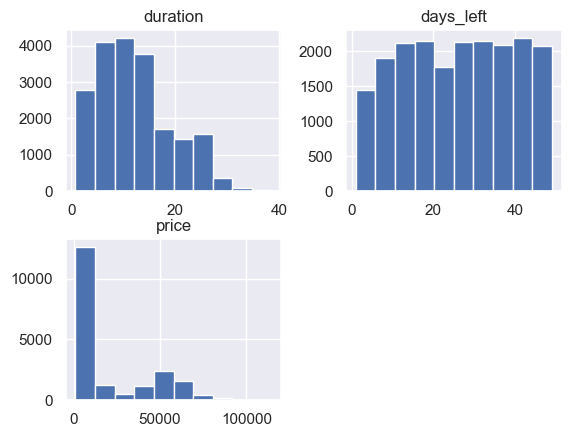

In [26]:
train.hist();

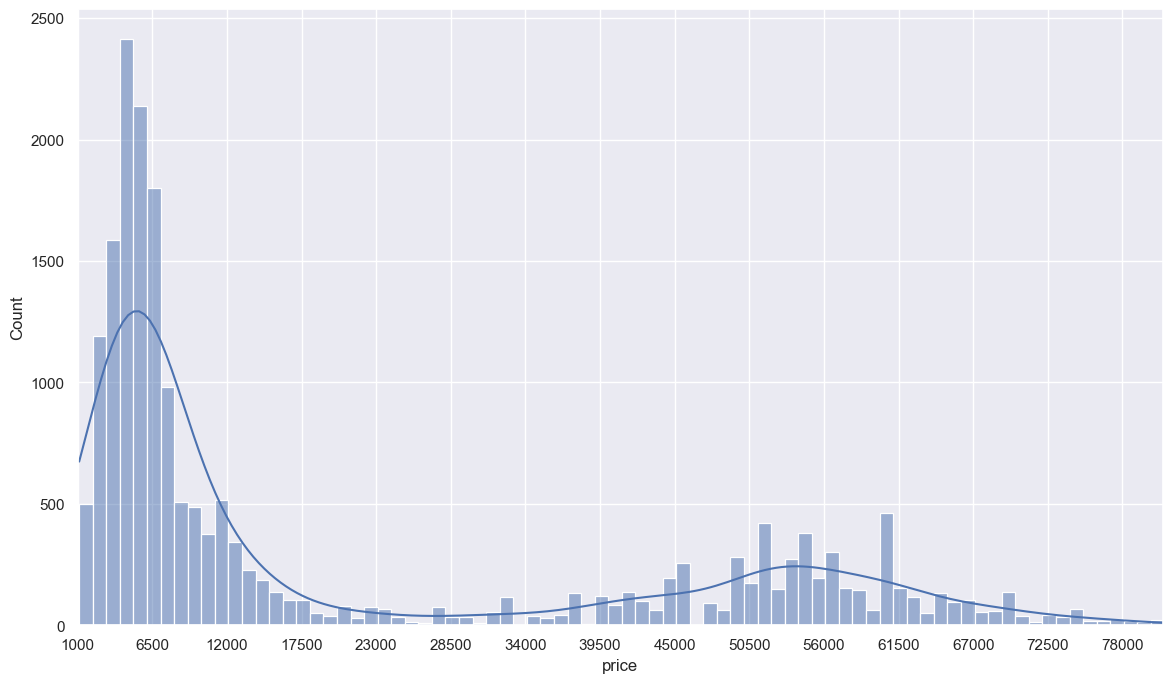

In [81]:
plt.figure(figsize=(14, 8))
# data = train[train['price'] < 80_000]['price']
data = train[train['price'] < 81_000]['price']
sns.histplot(x=data, kde=True, binwidth=1000)  # bins="auto", binwidth=None, binrange=None
plt.xlim(data.min()-100, data.max())
plt.xticks(range(data.min()-105, data.max(), 5500))
plt.show()

**Summary**:
- **Model Type:** Machine Learning (prediction)

## Data Preprocessing

In [28]:
train.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64